In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import math

In [3]:
ev_df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\ElectricCarData_Clean.csv", index_col=False)

In [4]:
ev_df.dropna(inplace=True)
ev_df.reset_index(inplace=True)
ev_df.head(16)

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Sales
0,6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900,18277
1,10,Mercedes,EQC 400 4MATIC,5.1,180,370,216,440,Yes,AWD,Type 2 CCS,SUV,D,5,69484,"132,214"
2,14,Hyundai,IONIQ Electric,9.7,165,250,153,210,Yes,FWD,Type 2 CCS,Liftback,C,5,34459,9796
3,23,Audi,e-tron GT,3.5,240,425,197,850,Yes,AWD,Type 2 CCS,Sedan,F,4,125000,5369
4,24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480,300471
5,28,BMW,i3 120 Ah,7.3,150,235,161,270,Yes,RWD,Type 2 CCS,Hatchback,B,4,38017,4854
6,40,Tesla,Model S Long Range,3.8,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990,157992
7,41,Hyundai,Kona Electric 39 kWh,9.9,155,255,154,210,Yes,FWD,Type 2 CCS,SUV,B,5,33971,1461
8,42,Audi,e-tron Sportback 55 quattro,5.7,200,380,228,610,Yes,AWD,Type 2 CCS,SUV,E,5,81639,10240
9,45,Kia,e-Soul 64 kWh,7.9,167,365,175,340,Yes,FWD,Type 2 CCS,SUV,B,5,36837,648


In [5]:
def get_unique_val_map(df, col):
    map = {}
    track = 1
    for i in range(len(df)):
        element = df.loc[i, col]
        if element not in map:
            map[element] = track
            track += 1
    return map

In [6]:
brand_dict = get_unique_val_map(ev_df, 'Brand')
print(brand_dict)

{'Volkswagen ': 1, 'Mercedes ': 2, 'Hyundai ': 3, 'Audi ': 4, 'Tesla ': 5, 'BMW ': 6, 'Kia ': 7, 'Porsche ': 8, 'Skoda ': 9, 'Ford ': 10, 'Fiat ': 11}


In [7]:
power_train_dict = get_unique_val_map(ev_df, 'PowerTrain')
print(power_train_dict)

{'FWD': 1, 'AWD': 2, 'RWD': 3}


In [8]:
plug_type_dict = get_unique_val_map(ev_df, 'PlugType')
print(plug_type_dict)

{'Type 2 CCS': 1, 'Type 2': 2}


In [9]:
body_style_dict = get_unique_val_map(ev_df, 'BodyStyle')
print(body_style_dict)

{'Hatchback': 1, 'SUV': 2, 'Liftback': 3, 'Sedan': 4}


In [10]:
segment_dict = get_unique_val_map(ev_df, 'Segment')
print(segment_dict)

{'C': 1, 'D': 2, 'F': 3, 'B': 4, 'E': 5}


In [11]:
replace_list = [brand_dict, power_train_dict, plug_type_dict, body_style_dict, segment_dict]

In [12]:
for dict in replace_list:
    for key in dict:
        val = dict[key]
        ev_df.replace(key, val, inplace=True)

In [31]:
ev_df.head(16)
ev_df.replace('132,214', '132214', inplace=True)
#print(ev_df.loc[0, 'Sales'])
#print(ev_df.columns)

In [32]:
def get_dict_vals(df, col_name):
    map = {}
    for i in range(len(df)):
        key = df.loc[i, col_name]
        sales = int(df.loc[i, 'Sales '])
        if key in map:
            map[key] += sales
        else:
            map[key] = sales
    return map

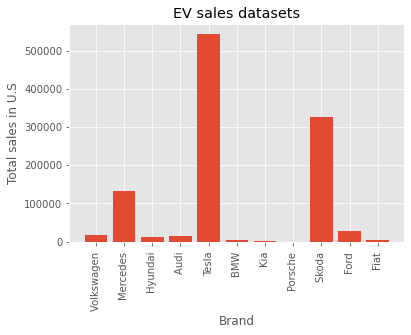

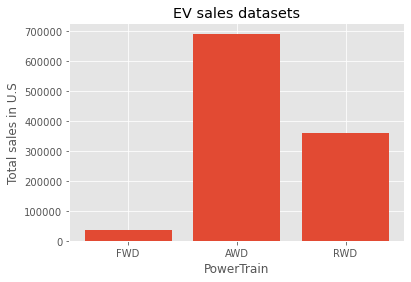

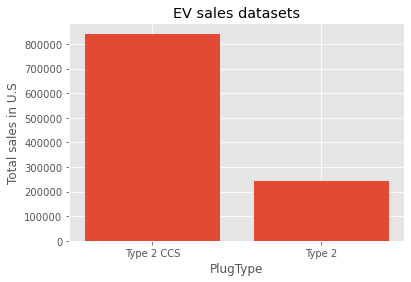

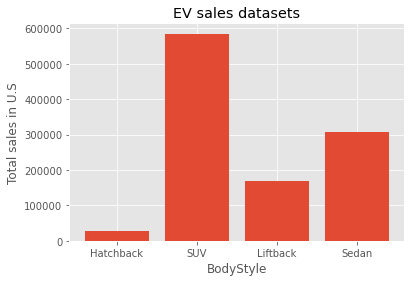

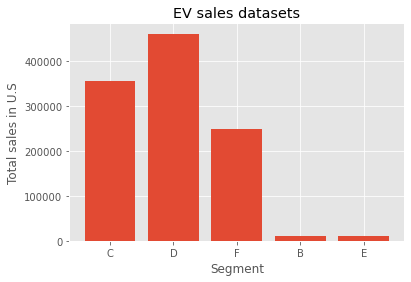

In [33]:
col_list = ['Brand', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
index = 0

for map in replace_list:
    
    data = []
    labels = []
    
    data_map = get_dict_vals(ev_df, col_list[index])
    
    
    for key in map:
        data.append(data_map[map[key]])
        labels.append(key)
        
    if index == 0:
        plt.xticks(rotation='vertical')
    plt.bar(labels, data)
    plt.title('EV sales datasets')
    plt.xlabel(col_list[index])
    plt.ylabel('Total sales in U.S')
    plt.show()
    
    index += 1

In [37]:
cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']

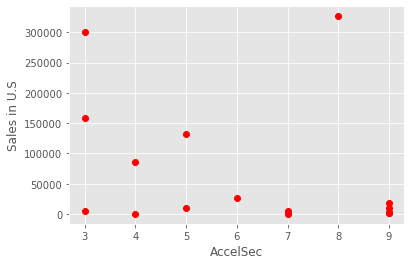

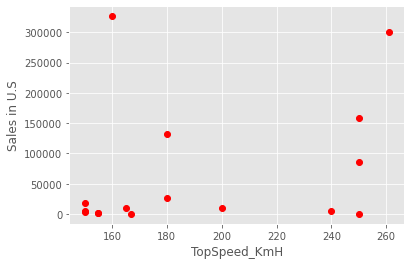

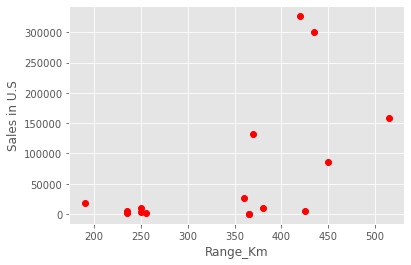

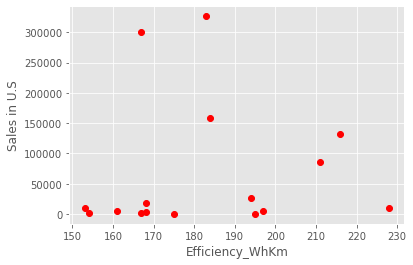

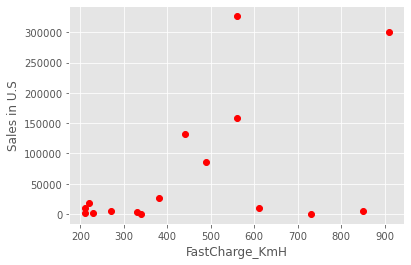

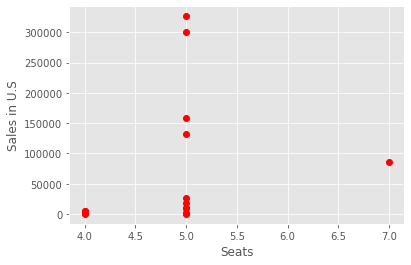

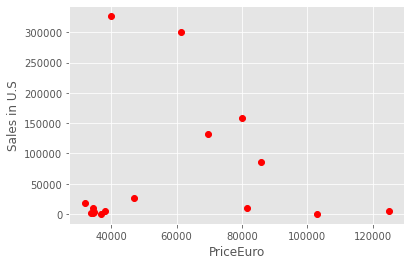

In [41]:
for col in cols:
    for i in range(len(ev_df)):
        x = int(ev_df.loc[i, col])
        y = int(ev_df.loc[i, 'Sales '])
       # print(x, ' ', y)
        plt.plot(x,y, 'ro')
    plt.xlabel(col)
    plt.ylabel('Sales in U.S')
    plt.show()